In [2]:
from judge import is_point_in_polyhedron
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import judge as judge



# example for a CUBE

In [3]:

point1 = [1, 1, 1]
vertices = [
    [0, 0, 0], [2, 0, 0], [2, 2, 0], [0, 2, 0],
    [0, 0, 2], [2, 0, 2], [2, 2, 2], [0, 2, 2]
]

faces = [
    [0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4],
    [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]
]
# Faces are defined by the indices of the vertices

point2 = [1, 1, 3]

print(is_point_in_polyhedron(point1, vertices, faces))  
print(is_point_in_polyhedron(point2, vertices, faces))

(True, 1)
(False, 0)


# Example for a Square frustum

In [4]:

# Vertices are defined by their coordinates
vertices = [
    [750, 2150, 45000],  # Bottom Vertices
    [750, -2150, 45000],
    [-750, -2150, 45000],
    [-750, 2150, 45000],
    [2500, 5000, 95000],   # Top Vertices
    [2500, -5000, 95000],
    [-2500, -5000, 95000],
    [-2500, 5000, 95000]
    
]

# Similar to the cube, faces are defined by the indices of the vertices
faces = [
    [0, 1, 2, 3],  # Bottom face
    [4, 5, 6, 7],  # Top face
    [0, 1, 5, 4],  # Side faces
    [1, 2, 6, 5],
    [2, 3, 7, 6],
    [3, 0, 4, 7]
]

print(vertices)
print(faces)

[[750, 2150, 45000], [750, -2150, 45000], [-750, -2150, 45000], [-750, 2150, 45000], [2500, 5000, 95000], [2500, -5000, 95000], [-2500, -5000, 95000], [-2500, 5000, 95000]]
[[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4], [1, 2, 6, 5], [2, 3, 7, 6], [3, 0, 4, 7]]


(True, 1)


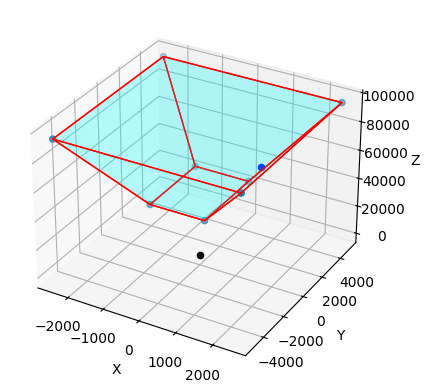

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

vertices_array = np.array(vertices)
ax.scatter(vertices_array[:, 0], vertices_array[:, 1], vertices_array[:, 2])


poly3d = [[vertices[vert_id] for vert_id in face] for face in faces]
ax.add_collection3d(Poly3DCollection(poly3d, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.15))
print(is_point_in_polyhedron([1000, 2500, 55000], vertices, faces))
ax.scatter(0, 0, 0, c='black', marker='o')
ax.scatter(1000, 2500, 55000, c='blue', marker='o')
# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [7]:

SHiPvertices = [
    [750, 2150, 45000],  # Bottom Vertices
    [750, -2150, 45000],
    [-750, -2150, 45000],
    [-750, 2150, 45000],
    [2500, 5000, 95000],   # Top Vertices
    [2500, -5000, 95000],
    [-2500, -5000, 95000],
    [-2500, 5000, 95000]
    
]

# Similar to the cube, faces are defined by the indices of the vertices
SHiPfaces = [
    [0, 1, 2, 3],  # Bottom face
    [4, 5, 6, 7],  # Top face
    [0, 1, 5, 4],  # Side faces
    [1, 2, 6, 5],
    [2, 3, 7, 6],
    [3, 0, 4, 7]
]
def judge_paralle(ray, v0, v1, v2):
    # True if ray is parallel to the plane defined by v0, v1, v2
    h = np.cross(v1 - v0, v2 - v0)
    len_h = np.linalg.norm(h)
    len_ray = np.linalg.norm(ray)
    if np.dot(ray, h) == 0:
        return True 
    
    else:
        return False
def moller_trumbore(v0, v1, v2, orig, dir):
        S = orig - v0
        E1 = v1 - v0
        E2 = v2 - v0
        S1 = np.cross(dir, E2)
        S2 = np.cross(S, E1)

        S1E1 = np.dot(S1, E1)
        if S1E1 == 0:
            return False, None, None, None

        t = np.dot(S2, E2) / S1E1
        b1 = np.dot(S1, S) / S1E1
        b2 = np.dot(S2, dir) / S1E1

        if t >= 0.0 and b1 >= 0.0 and b2 >= 0.0 and (1 - b1 - b2) >= 0.0:
            return True, t, b1, b2

        return False, None, None, None
def SHiP(point):

    ray_direction = np.random.rand(3) - 0.5
    ray_direction = ray_direction / np.linalg.norm(ray_direction)  # Normalize the ray direction
    intersections = 0

    for face in SHiPfaces:
        for i in range(1, len(face) - 1):
            v0 = np.array(SHiPvertices[face[0]])
            v1 = np.array(SHiPvertices[face[i]])
            v2 = np.array(SHiPvertices[face[i + 1]])
            while judge_paralle(ray_direction, v0, v1, v2):
                ray_direction = np.random.rand(3) - 0.5
                ray_direction = ray_direction / np.linalg.norm(ray_direction)
                # find a new ray direction that is not parallel to any of the plane
    # for face in SHiPfaces:
    #     for i in range(1, len(face) - 1):
            v0 = np.array(SHiPvertices[face[0]])
            v1 = np.array(SHiPvertices[face[i]])
            v2 = np.array(SHiPvertices[face[i + 1]])
            intersect, t, b1, b2 = moller_trumbore(v0, v1, v2, np.array(point), ray_direction)
            if intersect:
                intersections += 1

    return intersections % 2 == 1, intersections

point = [1000, 2500, 55000]
result = SHiP(point)
print(f"点 {point} 在棱台内部: {result}")


点 [1000, 2500, 55000] 在棱台内部: (True, 1)


## Example For a Cylinder

In [3]:
judge.is_point_in_cylinder([1, 1, 1], [0, 0, 0], [0, 0, 2], 1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()